In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=500,noise=0.30,random_state=2)

In [9]:
def plot_dataset(x,y,axes):
    plt.plot(x[y==0,0],x[y==0,1],'ro',markersize=3)
    plt.plot(x[y==1,0],x[y==1,1],'g^',markersize=3)
    plt.axis(axes)
    plt.xlabel('$x_1$',fontsize=18)
    plt.ylabel('$x_2$',fontsize=18)

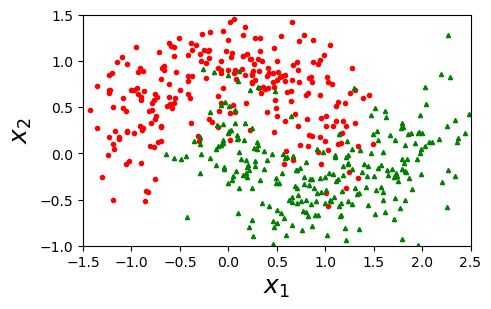

In [10]:
plt.figure(figsize=(5,3))
plot_dataset(x,y,[-1.5,2.5,-1,1.5])
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
tree_clf=DecisionTreeClassifier(max_depth=1)
ada_clf=AdaBoostClassifier(base_estimator=tree_clf,n_estimators=200,
                          learning_rate=0.5,random_state=1)

In [13]:
ada_clf.fit(x_train,y_train)
ada_clf.score(x_train,y_train)

C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.96

In [14]:
ada_clf.score(x_test,y_test)

0.864

In [15]:
def plot_decision_boundary(clf,x,y,axes=[-1.5,2.45,-1,1.5]):
    x1s=np.linspace(axes[0],axes[1],100)
    x2s=np.linspace(axes[2],axes[3],100)
    x1,x2=np.meshgrid(x1s,x2s)
    x_new=np.c_[x1.ravel(),x2.ravel()]
    y_pred=clf.predict(x_new).reshape(x1.shape)
    plt.contourf(x1,x2,y_pred,alpha=0.2)
    plt.contour(x1,x2,y_pred)
    plot_dataset(x,y,axes)

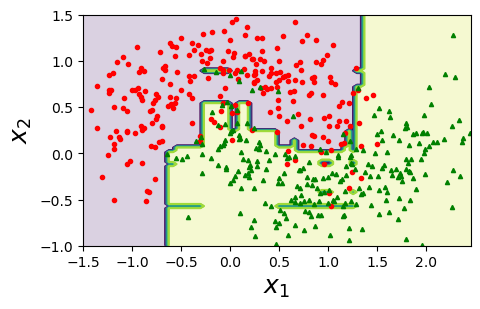

In [16]:
plt.figure(figsize=(5,3))
plot_decision_boundary(ada_clf,x,y)
plt.show()

In [17]:
np.random.seed(1)
m=200
x=np.random.rand(m,1)
y=4*(x[:,0]-0.5)**2+np.random.randn(m)/10

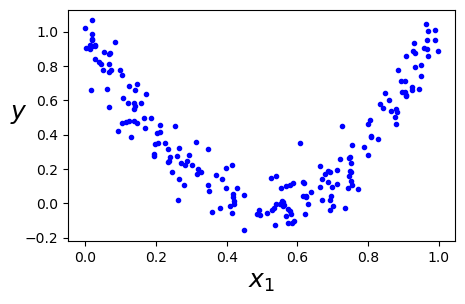

In [18]:
plt.figure(figsize=(5,3))
plt.plot(x,y,'b.')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$y$',fontsize=18,rotation=0)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
tree_reg=DecisionTreeRegressor(max_depth=3)
ada_reg=AdaBoostRegressor(base_estimator=tree_reg,n_estimators=200,
                         learning_rate=0.5,random_state=1)

In [21]:
ada_reg.fit(x_train,y_train)
ada_reg.score(x_train,y_train)

C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9002442201755443

In [22]:
ada_reg.score(x_test,y_test)

0.9022467390432937

In [27]:
def plot_regression_predictions(model,x,y,axes=[0,1,-0.2,1]):
    x1=np.linspace(axes[0],axes[1],500).reshape(-1,1)
    y_pred=model.predict(x1)
    plt.plot(x,y,'b.')
    plt.plot(x1,y_pred,'r-',linewidth=2,label='$\hat{y}$')
    plt.axis(axes)
    plt.xlabel('$x_1$',fontsize=18)
    plt.ylabel('$y$',fontsize=18,rotation=0)
    plt.legend(loc='upper center',fontsize=14)

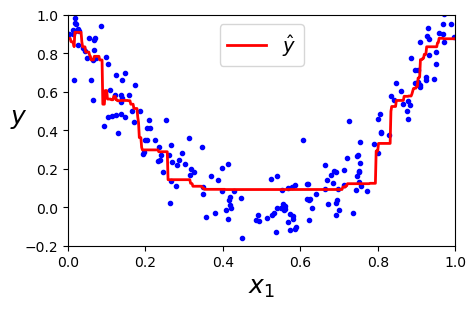

In [28]:
plt.figure(figsize=(5,3))
plot_regression_predictions(ada_reg,x,y)
plt.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
np.random.seed(1)
m=200
x=np.random.rand(m,1)
y=4*(x[:,0]-0.5)**2+np.random.randn(m)/10

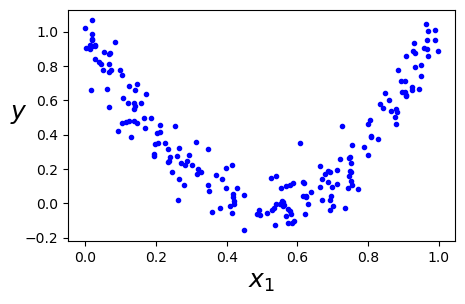

In [31]:
plt.figure(figsize=(5,3))
plt.plot(x,y,'b.')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$y$',fontsize=18,rotation=0)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg=GradientBoostingRegressor(max_depth=2,n_estimators=20,
                                random_state=1)
gb_reg.fit(x_train,y_train)
gb_reg.score(x_train,y_train)

0.881711350375725

In [35]:
gb_reg.score(x_test,y_test)

0.8616616654025059

In [36]:
def plot_regression_predictions(model,x,y,axes=[0,1,-0.2,1]):
    x1=np.linspace(axes[0],axes[1],500).reshape(-1,1)
    y_pred=model.predict(x1)
    plt.plot(x,y,'b.')
    plt.plot(x1,y_pred,'r-',linewidth=2,label='$\hat{y}$')
    plt.axis(axes)
    plt.xlabel('$x_1$',fontsize=18)
    plt.ylabel('$y$',fontsize=18,rotation=0)
    plt.legend(loc='upper center',fontsize=14)

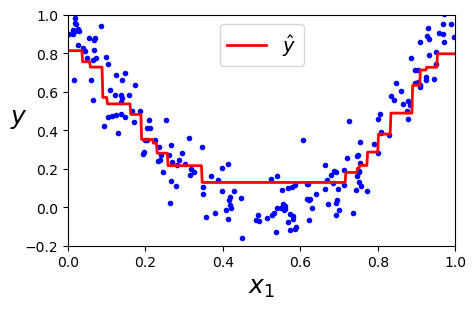

In [37]:
plt.figure(figsize=(5,3))
plot_regression_predictions(gb_reg,x,y)
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
gb_reg=GradientBoostingRegressor(max_depth=2,n_estimators=120,
                                random_state=1)
gb_reg.fit(x_train,y_train)
mses=[mean_squared_error(y_test,y_pred)
     for y_pred in gb_reg.staged_predict(x_test)]
best_n_estimators=np.argmin(mses)+1
best_n_estimators

80

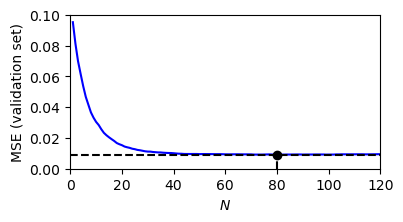

In [39]:
min_mse=np.min(mses)
plt.figure(figsize=(4,2))
plt.plot(range(1,121),mses,'b-')
plt.plot(best_n_estimators,min_mse,"ko")
plt.plot([best_n_estimators,best_n_estimators],[0,min_mse],"k--")
plt.plot([0,120],[min_mse,min_mse],"k--")
plt.axis([0,120,0,0.1])
plt.xlabel('$N$')
plt.ylabel('MSE (validation set)')
plt.show()

In [40]:
gb_reg_best=GradientBoostingRegressor(
max_depth=2,n_estimators= best_n_estimators,random_state=1)
gb_reg_best.fit(x_train,y_train)
gb_reg_best.score(x_test,y_test)

0.9175041453821576

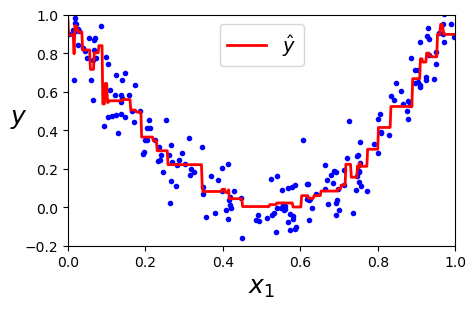

In [41]:
plt.figure(figsize=(5,3))
plot_regression_predictions(gb_reg_best,x,y)
plt.show()

In [42]:
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=500,noise=0.30,random_state=2)

In [43]:
def plot_dataset(x,y,axes):
    plt.plot(x[y==0,0],x[y==0,1],'ro',markersize=3)
    plt.plot(x[y==1,0],x[y==1,1],'g^',markersize=3)
    plt.axis(axes)
    plt.xlabel('$x_1$',fontsize=18)
    plt.ylabel('$x_2$',fontsize=18)

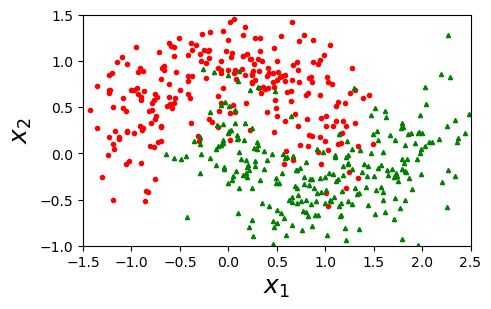

In [44]:
plt.figure(figsize=(5,3))
plot_dataset(x,y,[-1.5,2.5,-1,1.5])
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(n_estimators=1000,random_state=1)

In [47]:
gb_clf.fit(x_train,y_train)
gb_clf.score(x_train,y_train)

1.0

In [48]:
gb_clf.score(x_test,y_test)

0.856

In [49]:
def plot_decision_boundary(clf,x,y,axes=[-1.5,2.45,-1,1.5]):
    x1s=np.linspace(axes[0],axes[1],100)
    x2s=np.linspace(axes[2],axes[3],100)
    x1,x2=np.meshgrid(x1s,x2s)
    x_new=np.c_[x1.ravel(),x2.ravel()]
    y_pred=clf.predict(x_new).reshape(x1.shape)
    plt.contourf(x1,x2,y_pred,alpha=0.2)
    plt.contour(x1,x2,y_pred)
    plot_dataset(x,y,axes)

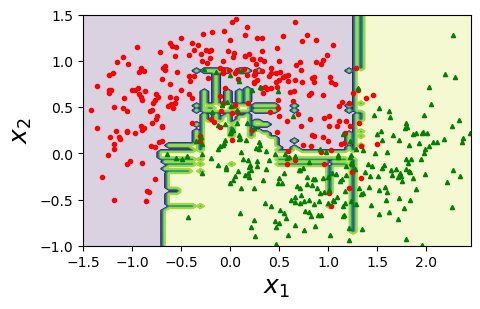

In [50]:
plt.figure(figsize=(5,3))
plot_decision_boundary(gb_clf,x,y)
plt.show()

In [51]:
from sklearn.metrics import accuracy_score
gb_clf=GradientBoostingClassifier(n_estimators=120,random_state=1)
gb_clf.fit(x_train,y_train)
errors=[1-accuracy_score(y_test,y_pred)
       for y_pred in gb_clf.staged_predict(x_test)]
best_n_estimators=np.argmin(errors)+1
best_n_estimators

46

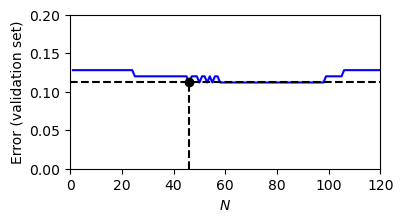

In [52]:
min_error=np.min(errors)
plt.figure(figsize=(4,2))
plt.plot(range(1,121),errors,'b-')
plt.plot(best_n_estimators,min_error,"ko")
plt.plot([best_n_estimators,best_n_estimators],[0,min_error],"k--")
plt.plot([0,120],[min_error,min_error],"k--")
plt.axis([0,120,0,0.2])
plt.xlabel('$N$')
plt.ylabel('Error (validation set)')
plt.show()

In [53]:
gb_clf_best=GradientBoostingClassifier(
n_estimators=best_n_estimators,random_state=1)
gb_clf_best.fit(x_train,y_train)
gb_clf_best.score(x_test,y_test)

0.888

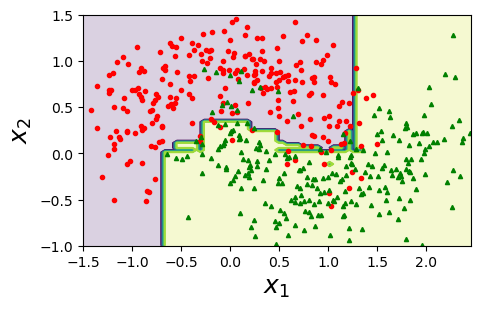

In [54]:
plt.figure(figsize=(5,3))
plot_decision_boundary(gb_clf_best,x,y)
plt.show()

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
from sklearn import datasets
x,y=datasets.load_iris(return_X_y=True)

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
x,y,stratify=y,random_state=1)

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
svc_pip=Pipeline([
    ('scaler',StandardScaler()),
    ('svc',LinearSVC(random_state=1))
])
estimators=[
    ('rf',RandomForestClassifier(n_estimators=10,random_state=1)),
    ('svc_pip',svc_pip)
]

In [59]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
clf=StackingClassifier(
estimators=estimators,final_estimator=LogisticRegression()
)

In [60]:
clf.fit(x_train,y_train).score(x_test,y_test)

C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: Futu

0.9736842105263158

In [72]:
from sklearn.datasets import load_diabetes
x,y=load_diabetes(return_X_y=True)

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
lr_pip=Pipeline([
    ('scaler',StandardScaler()),
    ('ridge',Ridge(random_state=1))
])
svr_pip=Pipeline([
    ('scaler',StandardScaler()),
    ('svr',LinearSVR(random_state=1))
])
estimators=[
    ('lr',lr_pip),
    ('svr',svr_pip)
]

In [75]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
reg=StackingRegressor(
estimators=estimators,
final_estimator=RandomForestRegressor(n_estimators=10,random_state=1))

In [76]:
reg.fit(x_train,y_train).score(x_test,y_test)

C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: Futu

0.27389430985075813